In [1]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [2]:
dir="C:/Users/Expedition/Desktop/expedition2025summer/"

In [ ]:
#data = ert.load(dir + '11Aug/nuna_a32_transect_long.dat')
#data.save(dir + '11Aug/nuna_a32_transect_long.txt', "a b m n err rhoa")

13/08/25 - 18:58:21 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [3]:
data = ert.load(dir + '16Aug/tuk_e20_h1.tx0')

27/08/25 - 02:24:23 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
27/08/25 - 02:24:23 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
27/08/25 - 02:24:23 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
27/08/25 - 02:24:23 - pyGIMLi - INFO - No electrode positions found!
27/08/25 - 02:24:23 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 565


In [5]:
data['err'] = data['err'] + 0.02

In [ ]:
#data['err'] = data['iperr']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x270bccdba50>)

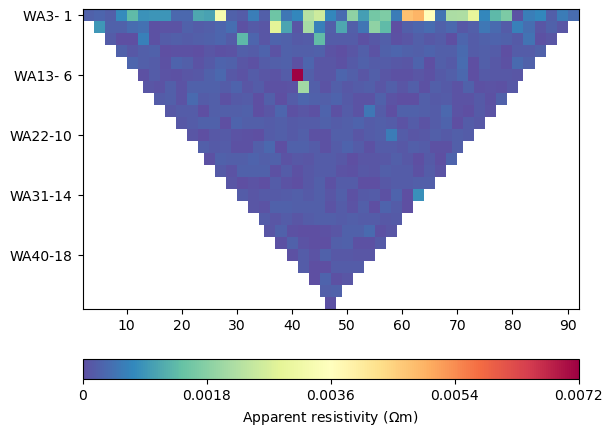

In [4]:
ert.showData(data,data['err'])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x270bccfb050>)

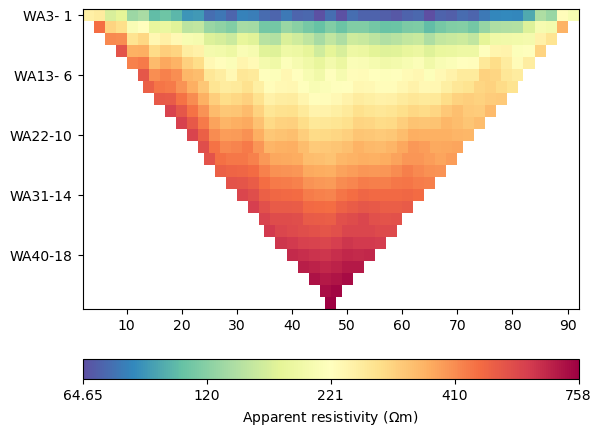

In [6]:
ert.showData(data)

In [7]:
data["k"] = ert.createGeometricFactors(data)

27/08/25 - 02:24:48 - pyGIMLi - INFO - Cache c:\Users\Expedition\miniconda3\envs\pgdev\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\6743279950300124856


27/08/25 - 02:24:57 - pyGIMLi - INFO - Found 2 regions.
27/08/25 - 02:24:57 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/08/25 - 02:24:57 - pyGIMLi - INFO - Found 2 regions.
27/08/25 - 02:24:57 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/08/25 - 02:24:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
27/08/25 - 02:24:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
27/08/25 - 02:24:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 15149 Cells: 29920 Boundaries: 22628
27/08/25 - 02:24:59 - pyGIMLi - INFO - Use median(data values)=291.974
27/08/25 - 02:24:59 - pyGIMLi - INFO - Created startmodel from forward operator:6466, min/max=291.974000/291.974000
27/08/25 - 02:24:59 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000270BD1F4180>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 2%/2.72%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  718.04
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   59.81 (dPhi = 91.59%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   43.06 (dPhi = 27.57%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.66 (dPhi = 94.27%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.87 (dPhi = 33.94%) lam: 20.

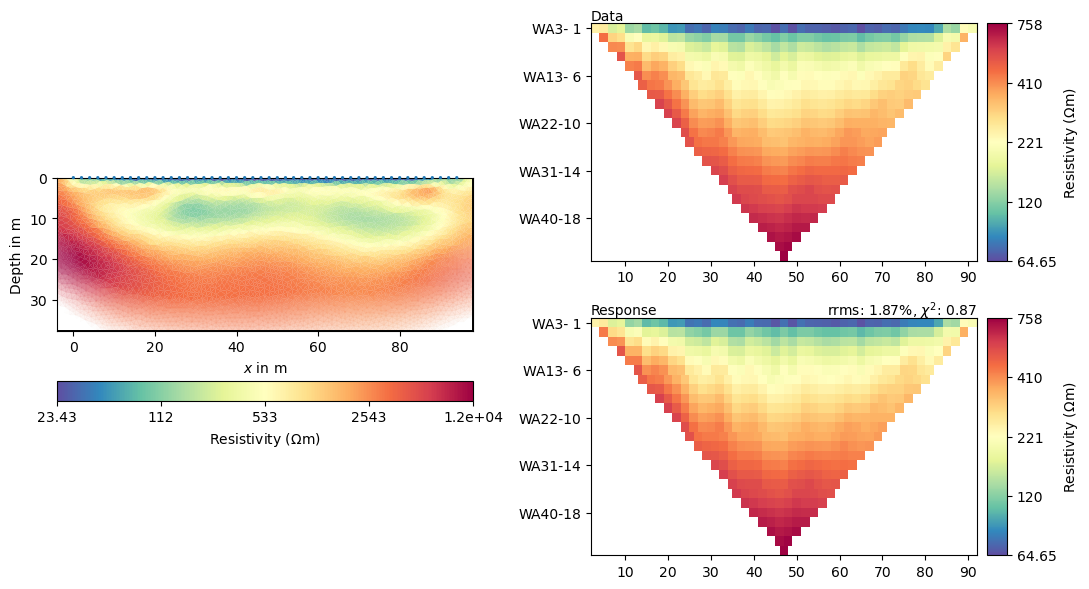

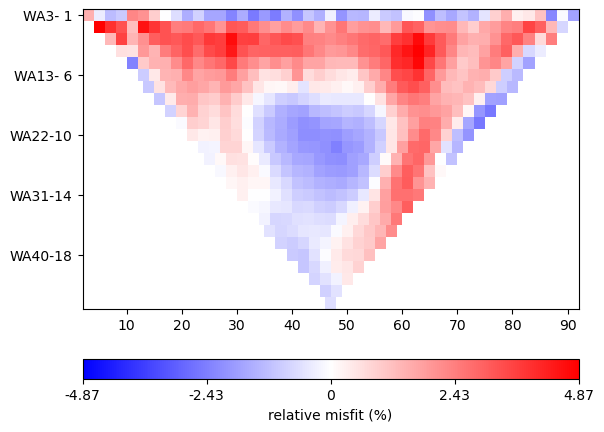

In [8]:
mgr = ert.ERTManager(data)
mgr.invert(data, verbose=True, paraDX = 0.25, zWeight=0.2, paraDZ= 0.25, lam=20, paraMaxCellSize=1)
mgr.showResultAndFit()
mgr.showMisfit()

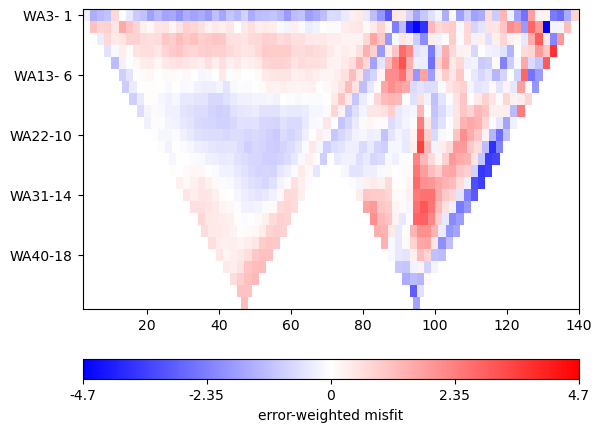

In [68]:
mgr.showMisfit(errorWeighted=True)

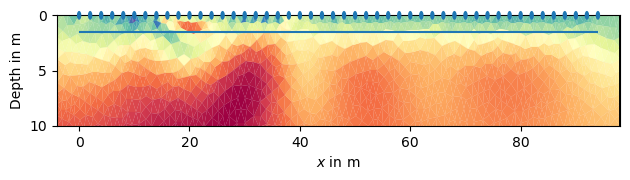

In [81]:
ax, cb = mgr.showResult(colorBar=False)
ax.hlines([-1.5], 0, 94)
ax.set_ylim(-10, 0)
ax.set_aspect(2)



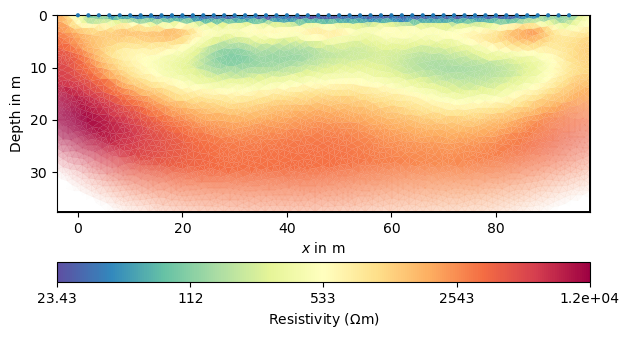

In [10]:
ax, cb = mgr.showResult()

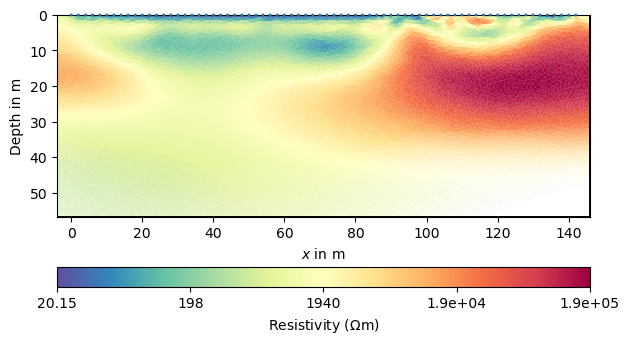

In [72]:
ax, cb = mgr.showResult()